# Lab Course Machine Learning
## Exercise Sheet 4
### Prof. Dr. Dr. Lars Schmidt-Thieme, Hadi Samer Jomaa
### Information Systems and Machine Learning Lab
University of Hildesheim
November 20th, 2016
Submission on November 27th, 2016 at 8:00 am, (on moodle, course code 3113)

Datasets
1. Classification Datasets
(a) Bank Marketing: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
(b) Occupancy Detection: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+
You are required to pre-process given datasets.
1. convert any non-numeric values to numeric values. For example you can replace a country name with an integer value or more appropriately use hot-one encoding. [Hint: use hashmap (dict) or pandas.get_dummies]. Please explain your solution.
2. If required drop out the rows with missing values or NA. In next lectures we will handle sparse data, which will allow us to use records with missing values.
3. Split the data into a train(80%) and test(20%) .



## Importing data from Bank Marketing & Formating
Data Brief: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).
	
In this step, 4 variables are generated on X and Y for training and testing 

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

D1 = pd.read_table("/home/salvatore/Documents/bank-additional.csv",sep=";") #Downloaded into my machine, the url gives a ZIP 
D1.drop('duration', axis=1, inplace=True) #Droping this column as suggested by the datasite
D1.replace({"pdays":{999:0}},inplace=True) #Changing the value of 999 to 0 in "pdays"
D1.replace({"y":{"no":0,"yes":1}},inplace=True) #Changing the No for "0" and Yes for "1"
D1["Ones"] = np.ones(len(D1)) #Added for the bias
DT1 = pd.get_dummies(D1)
DT1 = DT1[['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'Ones','y']]#This is just to assure that
                                                               # the "y" values are at the end
msk = np.random.rand(len(DT1)) < 0.8  #Random assign\n",
#Train Data
D1tr = DT1[msk]
D1tst = DT1[~msk]
D1xtr = np.array(tr[tr.columns[0:63]])
D1ytr = np.array([tr['y']]).T

#Test Data
D1xts = np.array(tst[tr.columns[0:63]])
D1Yts = np.array([tst['y']]).T

DT1.head() #Show how the data columns looklike

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Ones,y
0,30,2,0,0,-1.8,92.893,-46.2,1.313,5099.1,0,...,1,0,0,0,0,0,1,0,1.0,0
1,39,4,0,0,1.1,93.994,-36.4,4.855,5191.0,0,...,1,0,0,0,0,0,1,0,1.0,0
2,25,1,0,0,1.4,94.465,-41.8,4.962,5228.1,0,...,0,0,0,0,1,0,1,0,1.0,0
3,38,3,0,0,1.4,94.465,-41.8,4.959,5228.1,0,...,1,0,0,0,0,0,1,0,1.0,0
4,47,1,0,0,-0.1,93.200,-42.0,4.191,5195.8,1,...,0,1,0,0,0,0,1,0,1.0,0


## Importing data from Occupancy & formatting
Data Brief: Experimental data used for binary classification (room occupancy) from Temperature,Humidity,Light and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.


4 variables are generated on X and Y, for training and testing 

In [105]:
D2 = pd.read_csv("/home/salvatore/Documents/datatest2.txt")
D2.drop('date', axis=1, inplace=True) #Droping this column as it only shows that data was taken cronologically
#Final variables: Temperature, Humidity, Light, CO2 and Humidity Ratio
# Randomizing showed bellow
msk = np.random.rand(len(D2)) < 0.8  #Random assign"
#Train Data "Tr"  D2 stand for data set 2
D2tr = D2[msk]
D2ts = D2[~msk]

D2xtr = np.array(D2tr[D2tr.columns[0:4]])
D2ytr = np.array([D2tr['Occupancy']]).T

#Test Data "Ts" D2 stand for data set 2
D2xts = np.array(D2ts[D2ts.columns[0:4]])
D2yts = np.array([D2ts['Occupancy']]).T

D2.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,21.7900,31.133333,437.333333,1005.666667,0.005030,1


## Defining functions

In [241]:
def PofX(B,x): #Calculates the probability given vector X and Betas (weight)
    PoofX = 1/(1+np.exp(-1*x.dot(B)))
    return PoofX

def Lglklh(B,x,y): #Calculates the likelihood for a given vector X and B, comparing vs true values Y
    p = PofX(B,x)
    Liklh = np.sum(y*np.log(p) + (1-y)*np.log(1 - p))
    return Liklh

def Adagrad(Gd,h,mu): #Adagrad grad Descent
    h = h + Gd*Gd
    mu = mu*(h**-0.5)
    return h, mu

def BolDriv(mu,fnew,fold,incr,decr): #Bold driver grad descent Note: Incr>1.0  decr<1.0
    if fnew < fold:
        mu= mu*incr
    else:
        mu= mu*decr   
    return mu
    
#NOTE: TO ACTIVATE A STEP SIZE METHOD, JUST ERASE THE HASHTAG SYMBOL IN FRONT OF IT
#IF BOTH OF THEM ARE "BLOCKED" THE PROGRAM WILL RUN WITH A CONSTANT STEP LENGHT

def SGALogReg(x,y,mu,epoch): #Stochastic Gradiend Descend
    Lss = [] #To store the loss
    ALV = [] #To store the error
    h = 0    #Used for adagrad
    Btr = np.array([[0]]*len(x.T))  #Betas values Initialized to 0
    for n in np.arange(epoch):      #Defining the number of times to run an epoch
        for i in np.arange(len(x)): #This will method will be applied for each row in the data training set
            p= PofX(Btr,x[i])       
            Gd = np.array([x[i]*((y[i]-p))]).T #Calculates de Gradient Descent
            Bn = Btr+mu*Gd                     #Calculates the new value of Betas
            h, mu = Adagrad(Gd,h,mu)             #AdaGrad
            #mu = BolDriv(mu,Lglklh(Bn,x[i],y[i]),Lglklh(Btr,x[i],y[i]),1.1,0.1)   #Bold Driver
            Error = Lglklh(Bn,x[i],y[i]) - Lglklh(Btr,x[i],y[i]) 
            Loss  = LossLog(Bn,x,y)
            Lss.append(Loss)
            ALV.append(Error)
            Btr = Bn
    plt.plot(Lss)
    plt.title("Loss vs iterations")
    plt.xlabel("Iteration")    
    plt.ylabel("Error as Log of Prob")
    plt.show()
    plt.plot(ALV)
    plt.title("Error vs iterations")
    plt.xlabel("Iteration")    
    plt.ylabel("Error as LogLikelihood")
    plt.show()
    return Gd, Lss, ALV

## Stochastic weights & Constant learing rate
Bellow are the graphs of the weights at constante rate (No adaGRad or BoldDriver)

### Bank Marketing

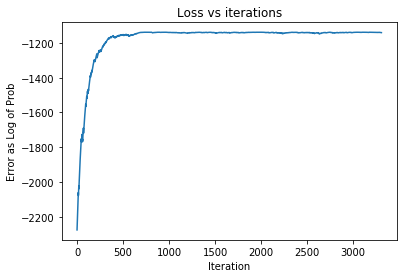

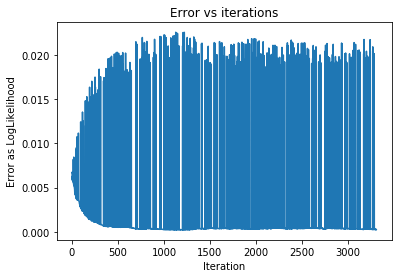

In [217]:
Gd, LssD1N, ErD1N = SGALogReg(D1xtr,D1ytr,1e-9,1) 
#Graphs using data from Bank Marketing

### Occupacy

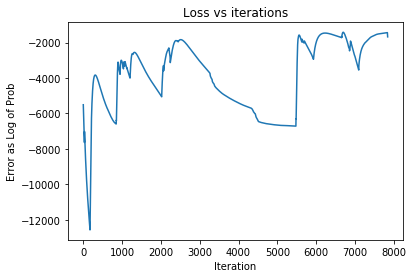

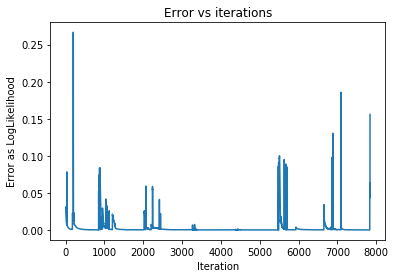

In [218]:
Gd, LssD2N, ErD2N = SGALogReg(D2xtr,D2ytr,1e-7,1) 
#Graphs using data for Occupacy


## Stochastic weights & AdaGrad
Bellow are the graphs of the weights with AdaGRad

### Bank Marketing
Using in this case AdaGrad, have produced an eror on the calculations due the gradient having zeros in the vector.
AdaGrad actualize the value of mu by dividint by the Gradient (Gd) vector (mu/sqrt(Gd*Gd))
That causes that the algorithm crashes.

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in power
  if sys.path[0] == '':
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply


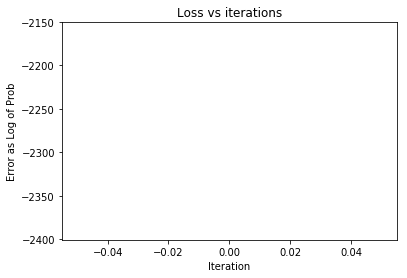

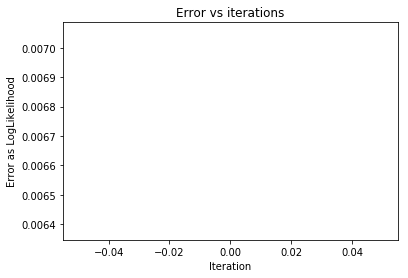

In [204]:
Gd, LssCLR, ErCLR = SGALogReg(D1xtr,D1ytr,1e-9,1) 
#Graphs using data from Bank Marketing

In [210]:
Gd.T

array([[ -1.95000000e+01,  -2.00000000e+00,  -0.00000000e+00,
         -0.00000000e+00,  -5.50000000e-01,  -4.69970000e+01,
          1.82000000e+01,  -2.42750000e+00,  -2.59550000e+03,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         -0.00000000e+00,  -5.00000000e-01,  -0.00000000e+00,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         -0.00000000e+00,  -0.00000000e+00,  -5.00000000e-01,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         -0.00000000e+00,  -5.00000000e-01,  -0.00000000e+00,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         -5.00000000e-01,  -0.00000000e+00,  -0.00000000e+00,
         -5.00000000e-01,  -0.00000000e+00,  -0.00000000e+00,
         -5.00000000e-01,  -0.00000000e+00,  -0.00000000e+00,
         -0.00000000e+00,  -5.00000000e-01,  -0.00000000e+00,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        

### Occupacy

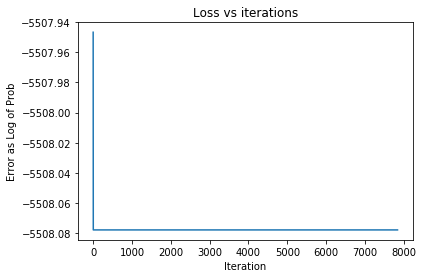

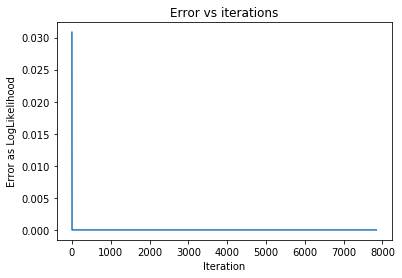

In [242]:
Gd, LssD2Ag, ErrD2Ag = SGALogReg(D2xtr,D2ytr,1e-7,1) 
#Graphs using data for Occupacy


## Stochastic weights & BoldDriver
Bellow are the graphs of the weights with Bold Driver

### Bank Marketing

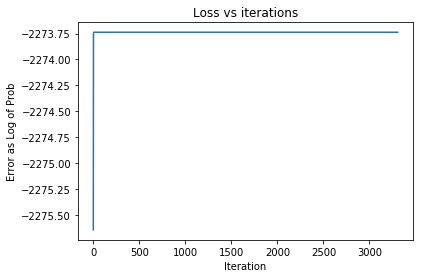

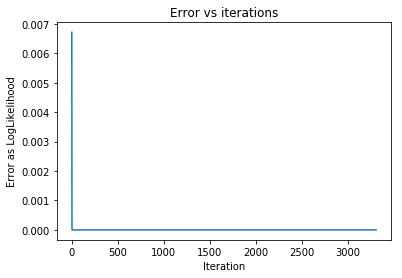

In [222]:
Gd, LssD1BD, ErD1BD = SGALogReg(D1xtr,D1ytr,1e-9,1) 
#Graphs using data from Bank Marketing

### Occupacy

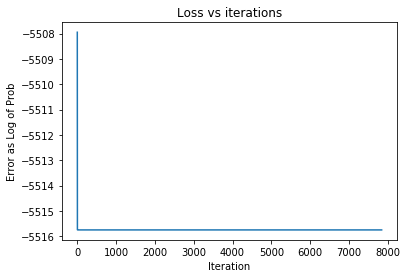

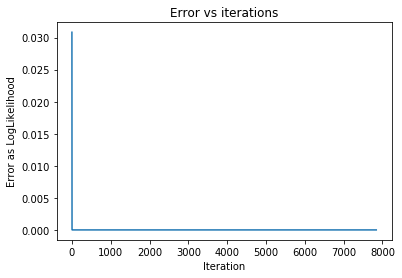

In [223]:
Gd, LssD2BD, ErrD2BD = SGALogReg(D2xtr,D2ytr,1e-7,1) 
#Graphs using data for Occupacy


## Comparing Learning Rates
Bellow is a graph comparing the 3 methods of Learning Rate: Bold Driver, AdaGrad & Constant
We can see that actually the constant Learning Rate converges slower than Ada Grad vs Bold Driver 

Giving a closer look (second plot), we can see that AdaGrad converges faster than Bold Driver in this case 
Note: Error values from Occupancy DataSet

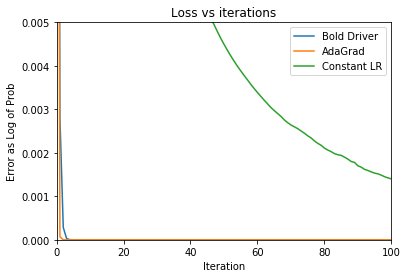

In [252]:
plt.plot(ErrD2BD)
plt.plot(ErrD2Ag)
plt.plot(ErD2N)
plt.title("Loss vs iterations")
plt.xlabel("Iteration")    
plt.ylabel("Error as Log of Prob")
plt.axis([0,100,0,0.5e-2])
plt.legend(["Bold Driver", "AdaGrad","Constant LR"])
plt.show()

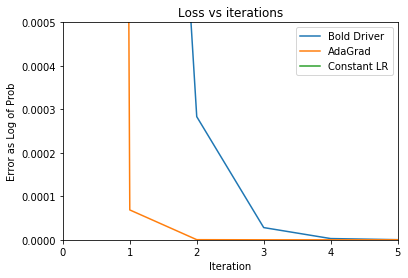

In [255]:
plt.plot(ErrD2BD)
plt.plot(ErrD2Ag)
plt.plot(ErD2N)
plt.title("Loss vs iterations")
plt.xlabel("Iteration")    
plt.ylabel("Error as Log of Prob")
plt.axis([0,5,0,0.5e-3])
plt.legend(["Bold Driver", "AdaGrad","Constant LR"])
plt.show()